In [ ]:
# ! pip install albumentations==0.4.6

     |████████████████████████████████| 117 kB 4.3 MB/s 
     |████████████████████████████████| 948 kB 29.1 MB/s 
  Created wheel for albumentations: filename=albumentations-0.4.6-py3-none-any.whl size=65174 sha256=5007dde7b8c0d65c1b465de18d68a1960c87e6407c504ab651bcd750b132dba1
  Stored in directory: /root/.cache/pip/wheels/cf/34/0f/cb2a5f93561a181a4bcc84847ad6aaceea8b5a3127469616cc
Successfully built albumentations
  Attempting uninstall: imgaug
    Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9
  Attempting uninstall: albumentations
    Found existing installation: albumentations 0.1.12
    Uninstalling albumentations-0.1.12:
      Successfully uninstalled albumentations-0.1.12


In [ ]:
import pandas as pd
import cv2
import albumentations as A
import numpy as np
import os
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline
from matplotlib import pyplot as plt

In [ ]:
# transform = A.Compose([
#     A.RandomCrop(width=450, height=450),
#     A.HorizontalFlip(p=0.5),
#     A.RandomBrightnessContrast(p=0.2),
# ], bbox_params=A.BboxParams(format='yolo'))

In [ ]:
# data = pd.DataFrame({
#      'img': ['53b812a205144b49ba0d173b4fb49b64.jpg', '53b812a205144b49ba0d173b4fb49b64.jpg', 'c4f7cc074455478abfddbeb9bfb81b05.jpg', '81f99790c0f54011bbdc75203aa2edf7.jpg'],
#      'x_centr': [0.512677, 0.698408, 0.653597, 0.222877],
#      'y_centr': [0.521382, 0.432566, 0.101562, 0.135280],
#      'w': [0.116156, 0.320165, 0.111439, 0.127358],
#      'h': [0.120066, 0.210526, 0.203125, 0.109375],
#      'classes': [0, 1, 2, 8]})

In [ ]:
# data

In [ ]:
data = pd.read_csv("Ecoline-2021-09_2022-03-10.csv", sep=";")

In [ ]:
data = data.drop(columns=["FractionId"])
data = data.drop(columns=["FractionName"])
data = data.drop(columns=["SeriesName"])
data = data.drop(columns=["AllPhotoSegmentsClassified"])
data = data.drop(columns=["Question"])

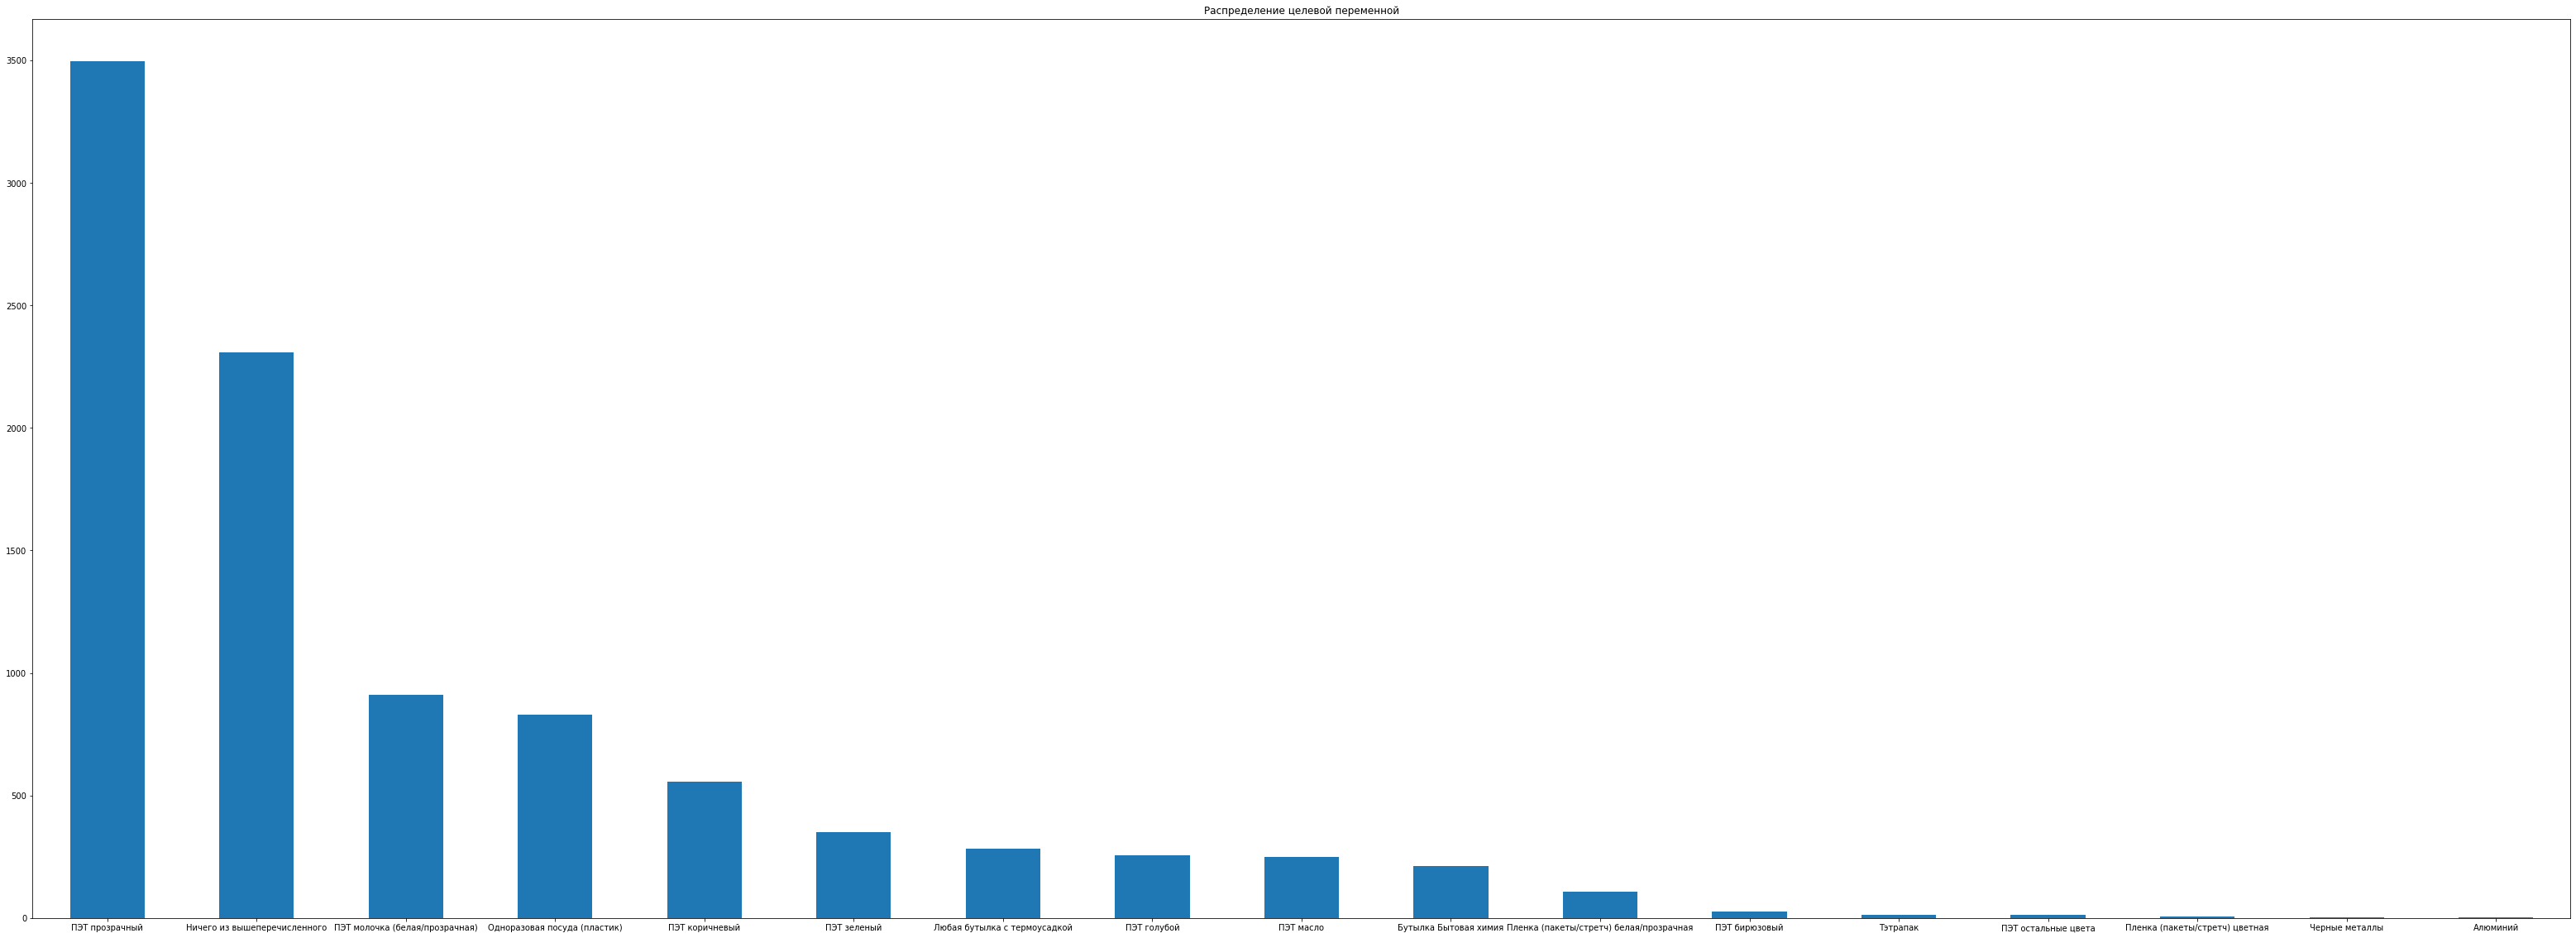

In [ ]:
data['Answer'].value_counts().plot.bar(figsize = (55,20))
plt.xticks(rotation=0)
plt.title('Распределение целевой переменной')
plt.show()

In [ ]:
y = data['Points']
arr = np.zeros((len(y), 4))

for i in range(len(y)):
  arr[i][2] = 1700
  arr[i][3] = 1300

In [ ]:
def coord(y, arr):
  ss = 0
  for i in range(len(y)):
    z = y[i]
    z = z[2: len(y[i]) - 2]
    z = z.split("},{")
    for j in range(len(z)):
      tmp = z[j].split(",")
      tmp_1 = tmp[0].split(":")
      tmp_2 = tmp[1].split(":")
      x = int(tmp_1[1])
      cord_y = int(tmp_2[1])
      if x > arr[i][0]:
        arr[i][0] = x
      if x < arr[i][2]:
        arr[i][2] = x
      if cord_y > arr[i][1]:
        arr[i][1] = cord_y
      if cord_y < arr[i][3]:
        arr[i][3] = cord_y
      ss += 1
  return arr, ss

In [ ]:
aray, ss = coord(y, arr)

In [ ]:
aray

array([[ 968.,  707.,  771.,  561.],
       [1456.,  654.,  913.,  398.],
       [1100.,  606.,  820.,  451.],
       ...,
       [ 471., 1063.,  127.,  720.],
       [ 585.,  345.,  256.,   84.],
       [1203.,  247., 1014.,    0.]])

In [ ]:
pic = data['ImageFileName']

def pictures(pic):
  new = 'jpg'
  for i in range(len(pic)):
    pic[i] = pic[i][:len(pic[i]) - 3] + new
    # pic[i] = pic[i] + new
  return pic

pic = pictures(pic)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
pic

0        53b812a205144b49ba0d173b4fb49b64.jpg
1        53b812a205144b49ba0d173b4fb49b64.jpg
2        53b812a205144b49ba0d173b4fb49b64.jpg
3        53b812a205144b49ba0d173b4fb49b64.jpg
4        53b812a205144b49ba0d173b4fb49b64.jpg
                         ...                 
12030    81f99790c0f54011bbdc75203aa2edf7.jpg
12031    81f99790c0f54011bbdc75203aa2edf7.jpg
12032    81f99790c0f54011bbdc75203aa2edf7.jpg
12033    81f99790c0f54011bbdc75203aa2edf7.jpg
12034    81f99790c0f54011bbdc75203aa2edf7.jpg
Name: ImageFileName, Length: 12035, dtype: object

In [ ]:
df1 = pd.DataFrame(pic)
# df1['classes'] = 0
df2 = pd.DataFrame(aray)
df = pd.concat([df1, df2], axis=1)
df = df.rename(columns={0: 'xmax', 1: 'ymax', 2: 'xmin', 3: 'ymin'})
df

,ImageFileName,xmax,ymax,xmin,ymin
0,53b812a205144b49ba0d173b4fb49b64.jpg,968.0,707.0,771.0,561.0
1,53b812a205144b49ba0d173b4fb49b64.jpg,1456.0,654.0,913.0,398.0
2,53b812a205144b49ba0d173b4fb49b64.jpg,1100.0,606.0,820.0,451.0
3,53b812a205144b49ba0d173b4fb49b64.jpg,1271.0,869.0,914.0,668.0
4,53b812a205144b49ba0d173b4fb49b64.jpg,1138.0,1052.0,809.0,768.0
...,...,...,...,...,...
12030,81f99790c0f54011bbdc75203aa2edf7.jpg,471.0,49.0,329.0,0.0
12031,81f99790c0f54011bbdc75203aa2edf7.jpg,287.0,156.0,60.0,4.0
12032,81f99790c0f54011bbdc75203aa2edf7.jpg,471.0,1063.0,127.0,720.0
12033,81f99790c0f54011bbdc75203aa2edf7.jpg,585.0,345.0,256.0,84.0


In [ ]:
img_h, img_w, num_channels = (1216, 1696, 3) # 1216 1696
df['x_center'] = ((df['xmin'] + df['xmax']) / 2) / img_w
df['y_center'] = ((df['ymin'] + df['ymax']) / 2) / img_h
df['w'] = (df['xmax'] - df['xmin']) / (img_w + 50)
df['h'] = (df['ymax'] - df['ymin']) / (img_h + 50)


# df['classes'] = data['Answer']
df['classes'] = 0
# df['x_center'] = round(df['x_center']/img_w, 6)
# df['w'] = round(df['w']/img_w, 6)
# df['y_center'] = round(df['y_center']/img_h, 6)
# df['h'] = round(df['h']/img_h, 6)
df.head()

,ImageFileName,xmax,ymax,xmin,ymin,x_center,y_center,w,h,classes
0,53b812a205144b49ba0d173b4fb49b64.jpg,968.0,707.0,771.0,561.0,0.512677,0.521382,0.112829,0.115324,0
1,53b812a205144b49ba0d173b4fb49b64.jpg,1456.0,654.0,913.0,398.0,0.698408,0.432566,0.310997,0.202212,0
2,53b812a205144b49ba0d173b4fb49b64.jpg,1100.0,606.0,820.0,451.0,0.566038,0.434622,0.160367,0.122433,0
3,53b812a205144b49ba0d173b4fb49b64.jpg,1271.0,869.0,914.0,668.0,0.644163,0.631990,0.204467,0.158768,0
4,53b812a205144b49ba0d173b4fb49b64.jpg,1138.0,1052.0,809.0,768.0,0.573998,0.748355,0.188431,0.224329,0


In [ ]:
df['classes'] = data['Answer']
d = {'Ничего из вышеперечисленного': 0, 'ПЭТ коричневый': 1, 'ПЭТ прозрачный': 2, 'ПЭТ зеленый': 3, 'NaN': 4, 'ПЭТ масло': 5, 'ПЭТ молочка (белая/прозрачная)': 6,
     'ПЭТ голубой': 7, 'Одноразовая посуда (пластик)': 8, 'Любая бутылка с термоусадкой': 9, 'Бутылка Бытовая химия': 10, 'Черные металлы': 11, 'Пленка (пакеты/стретч) белая/прозрачная': 12, 'Тэтрапак': 13, 'ПЭТ бирюзовый': 14, 
     'Пленка (пакеты/стретч) цветная': 15, 'ПЭТ остальные цвета': 16, 'Алюминий': 17}
df = df.replace({'classes' : d})
df

,ImageFileName,xmax,ymax,xmin,ymin,x_center,y_center,w,h,classes
0,53b812a205144b49ba0d173b4fb49b64.jpg,968.0,707.0,771.0,561.0,0.512677,0.521382,0.112829,0.115324,0.0
1,53b812a205144b49ba0d173b4fb49b64.jpg,1456.0,654.0,913.0,398.0,0.698408,0.432566,0.310997,0.202212,1.0
2,53b812a205144b49ba0d173b4fb49b64.jpg,1100.0,606.0,820.0,451.0,0.566038,0.434622,0.160367,0.122433,2.0
3,53b812a205144b49ba0d173b4fb49b64.jpg,1271.0,869.0,914.0,668.0,0.644163,0.631990,0.204467,0.158768,3.0
4,53b812a205144b49ba0d173b4fb49b64.jpg,1138.0,1052.0,809.0,768.0,0.573998,0.748355,0.188431,0.224329,2.0
...,...,...,...,...,...,...,...,...,...,...
12030,81f99790c0f54011bbdc75203aa2edf7.jpg,471.0,49.0,329.0,0.0,0.235849,0.020148,0.081329,0.038705,2.0
12031,81f99790c0f54011bbdc75203aa2edf7.jpg,287.0,156.0,60.0,4.0,0.102300,0.065789,0.130011,0.120063,0.0
12032,81f99790c0f54011bbdc75203aa2edf7.jpg,471.0,1063.0,127.0,720.0,0.176297,0.733141,0.197022,0.270932,NaN
12033,81f99790c0f54011bbdc75203aa2edf7.jpg,585.0,345.0,256.0,84.0,0.247936,0.176398,0.188431,0.206161,0.0


In [ ]:
df1 = df[~np.isnan(df['classes'])]
df1

,ImageFileName,xmax,ymax,xmin,ymin,x_center,y_center,w,h,classes
0,53b812a205144b49ba0d173b4fb49b64.jpg,968.0,707.0,771.0,561.0,0.512677,0.521382,0.112829,0.115324,0.0
1,53b812a205144b49ba0d173b4fb49b64.jpg,1456.0,654.0,913.0,398.0,0.698408,0.432566,0.310997,0.202212,1.0
2,53b812a205144b49ba0d173b4fb49b64.jpg,1100.0,606.0,820.0,451.0,0.566038,0.434622,0.160367,0.122433,2.0
3,53b812a205144b49ba0d173b4fb49b64.jpg,1271.0,869.0,914.0,668.0,0.644163,0.631990,0.204467,0.158768,3.0
4,53b812a205144b49ba0d173b4fb49b64.jpg,1138.0,1052.0,809.0,768.0,0.573998,0.748355,0.188431,0.224329,2.0
...,...,...,...,...,...,...,...,...,...,...
12029,81f99790c0f54011bbdc75203aa2edf7.jpg,785.0,925.0,449.0,640.0,0.363797,0.643503,0.192440,0.225118,10.0
12030,81f99790c0f54011bbdc75203aa2edf7.jpg,471.0,49.0,329.0,0.0,0.235849,0.020148,0.081329,0.038705,2.0
12031,81f99790c0f54011bbdc75203aa2edf7.jpg,287.0,156.0,60.0,4.0,0.102300,0.065789,0.130011,0.120063,0.0
12033,81f99790c0f54011bbdc75203aa2edf7.jpg,585.0,345.0,256.0,84.0,0.247936,0.176398,0.188431,0.206161,0.0


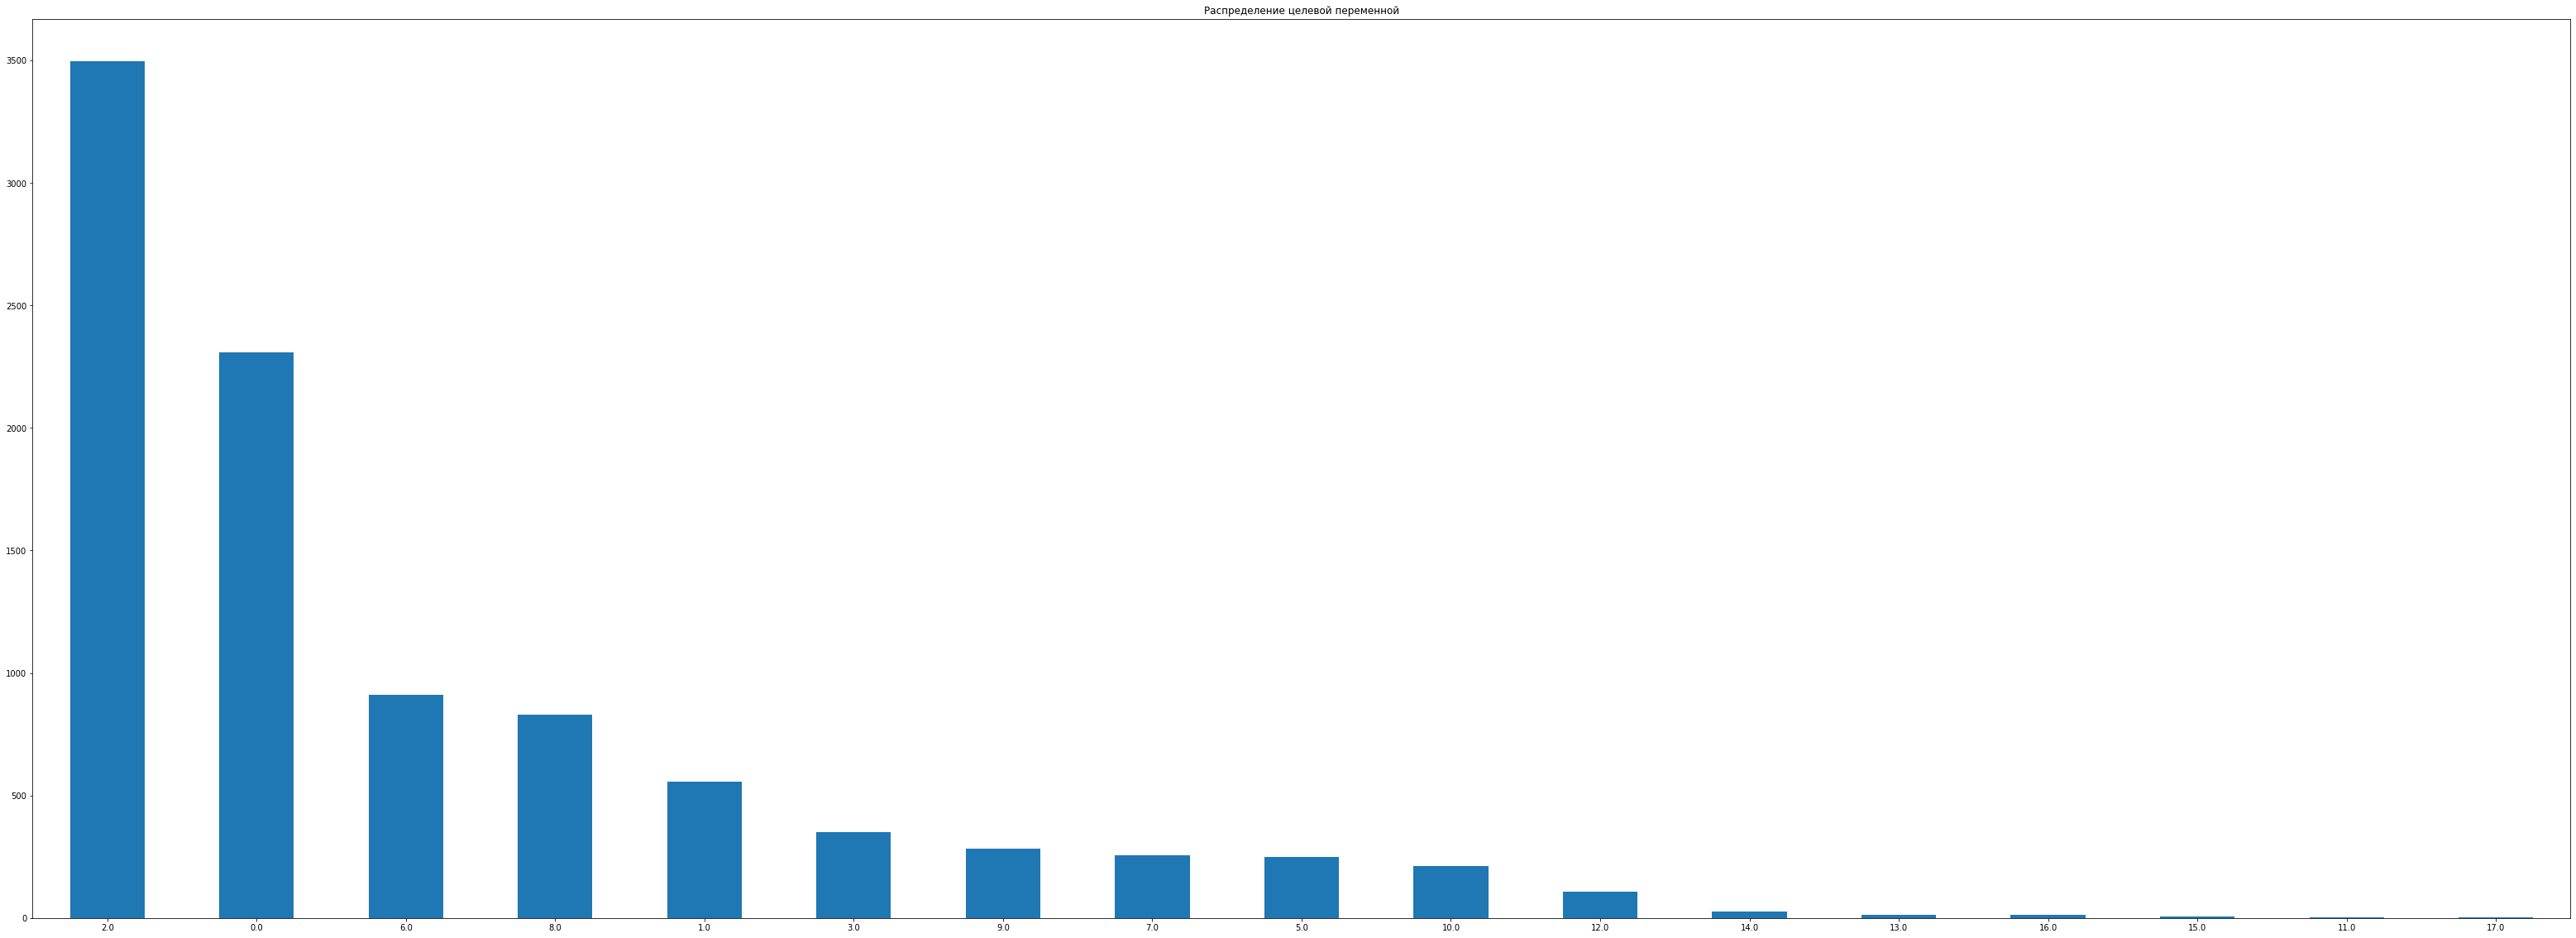

In [ ]:
df1['classes'].value_counts().plot.bar(figsize = (55,20))
plt.xticks(rotation=0)
plt.title('Распределение целевой переменной')
plt.show()

In [ ]:
df1 = df1.reset_index(drop=True)
df1

,ImageFileName,xmax,ymax,xmin,ymin,x_center,y_center,w,h,classes
0,53b812a205144b49ba0d173b4fb49b64.jpg,968.0,707.0,771.0,561.0,0.512677,0.521382,0.112829,0.115324,0.0
1,53b812a205144b49ba0d173b4fb49b64.jpg,1456.0,654.0,913.0,398.0,0.698408,0.432566,0.310997,0.202212,1.0
2,53b812a205144b49ba0d173b4fb49b64.jpg,1100.0,606.0,820.0,451.0,0.566038,0.434622,0.160367,0.122433,2.0
3,53b812a205144b49ba0d173b4fb49b64.jpg,1271.0,869.0,914.0,668.0,0.644163,0.631990,0.204467,0.158768,3.0
4,53b812a205144b49ba0d173b4fb49b64.jpg,1138.0,1052.0,809.0,768.0,0.573998,0.748355,0.188431,0.224329,2.0
...,...,...,...,...,...,...,...,...,...,...
9613,81f99790c0f54011bbdc75203aa2edf7.jpg,785.0,925.0,449.0,640.0,0.363797,0.643503,0.192440,0.225118,10.0
9614,81f99790c0f54011bbdc75203aa2edf7.jpg,471.0,49.0,329.0,0.0,0.235849,0.020148,0.081329,0.038705,2.0
9615,81f99790c0f54011bbdc75203aa2edf7.jpg,287.0,156.0,60.0,4.0,0.102300,0.065789,0.130011,0.120063,0.0
9616,81f99790c0f54011bbdc75203aa2edf7.jpg,585.0,345.0,256.0,84.0,0.247936,0.176398,0.188431,0.206161,0.0


In [ ]:
! unzip ./drive/MyDrive/vvv/ecoline.zip

Archive:  ./drive/MyDrive/vvv/ecoline.zip
  inflating: 001cc7f66f994e2f875490802e49a579.jpg  
  inflating: 001cc7f66f994e2f875490802e49a579.raw  
  inflating: 004f9110946b4c018ea4347d8d569fa5.jpg  
  inflating: 004f9110946b4c018ea4347d8d569fa5.raw  
  inflating: 00551392c98e412cb9facb545ab29278.jpg  
  inflating: 00551392c98e412cb9facb545ab29278.raw  
  inflating: 007a820dca9b442a9d4b27e67634e3cb.jpg  
  inflating: 007a820dca9b442a9d4b27e67634e3cb.raw  
  inflating: 00809adaa33c4c3ebe6e12e542b02843.jpg  
  inflating: 00809adaa33c4c3ebe6e12e542b02843.raw  
  inflating: 00a1a8b2772449d3afaee4ace8921c54.jpg  
  inflating: 00a1a8b2772449d3afaee4ace8921c54.raw  
  inflating: 00b5e587f3d64495aad7c449c33909a6.jpg  
  inflating: 00b5e587f3d64495aad7c449c33909a6.raw  
  inflating: 00c998833af04911af49cbcc600d9a6b.jpg  
  inflating: 00c998833af04911af49cbcc600d9a6b.raw  
  inflating: 00e0927ac3204dc8b1ecaf66dc07a740.jpg  
  inflating: 00e0927ac3204dc8b1ecaf66dc07a740.raw  
  inflating: 0100d0d19

In [ ]:
y = df1['classes']
xtr, xval, ytr, yval = train_test_split(np.array(df1), np.array(y), test_size=0.15, stratify=y, random_state=42)

In [ ]:
# df1 = pd.DataFrame(xtr)
# df1 = df1.rename(columns={0: 'img', 9: 'classes', 5: 'x_centr', 6: 'y_centr', 7: 'w', 8: 'h'}).sort_values(by=['img']).reset_index(drop=True)
# df1

In [ ]:
# df2 = pd.DataFrame(xval)
# df2 = df2.rename(columns={0: 'img', 9: 'classes', 5: 'x_centr', 6: 'y_centr', 7: 'w', 8: 'h'}).sort_values(by=['img']).reset_index(drop=True)
# df2

In [ ]:
# da = df1[['img', 'x_centr', 'y_centr', 'w', 'h', 'classes']]
# da

In [ ]:
da1 = df1[:8176]
da1 = da1[['ImageFileName', 'x_center', 'y_center', 'w', 'h', 'classes']]
da1

,ImageFileName,x_center,y_center,w,h,classes
0,53b812a205144b49ba0d173b4fb49b64.jpg,0.512677,0.521382,0.112829,0.115324,0.0
1,53b812a205144b49ba0d173b4fb49b64.jpg,0.698408,0.432566,0.310997,0.202212,1.0
2,53b812a205144b49ba0d173b4fb49b64.jpg,0.566038,0.434622,0.160367,0.122433,2.0
3,53b812a205144b49ba0d173b4fb49b64.jpg,0.644163,0.631990,0.204467,0.158768,3.0
4,53b812a205144b49ba0d173b4fb49b64.jpg,0.573998,0.748355,0.188431,0.224329,2.0
...,...,...,...,...,...,...
995,6bc7e594eefa4028947584060c9a6818.jpg,0.350531,0.270970,0.092211,0.177725,2.0
996,6bc7e594eefa4028947584060c9a6818.jpg,0.497052,0.413240,0.296678,0.261453,2.0
997,6bc7e594eefa4028947584060c9a6818.jpg,0.344929,0.638158,0.101947,0.230648,9.0
998,6bc7e594eefa4028947584060c9a6818.jpg,0.051297,0.779605,0.079038,0.197472,2.0


In [ ]:
da1 = da1.rename(columns={'ImageFileName': 'img'}).sort_values(by=['img']).sort_values(by=['img']).reset_index(drop=True)
da1

,img,x_center,y_center,w,h,classes
0,0100d0d193594037848b82f444081fec.jpg,0.543042,0.831414,0.201604,0.235387,6.0
1,0100d0d193594037848b82f444081fec.jpg,0.823408,0.272615,0.102520,0.304107,2.0
2,0100d0d193594037848b82f444081fec.jpg,0.798644,0.572368,0.095647,0.123223,8.0
3,0100d0d193594037848b82f444081fec.jpg,0.750000,0.924753,0.108820,0.128752,0.0
4,0100d0d193594037848b82f444081fec.jpg,0.533019,0.416530,0.109966,0.353081,9.0
...,...,...,...,...,...,...
995,f9f1194fbdb94047a1e41c32aa9fee25.jpg,0.336675,0.724918,0.147766,0.270932,8.0
996,fc52531eb1c04bd5b3685e116eaeac60.jpg,0.746462,0.871299,0.126002,0.245656,5.0
997,fc52531eb1c04bd5b3685e116eaeac60.jpg,0.572818,0.740132,0.096793,0.345972,9.0
998,fc52531eb1c04bd5b3685e116eaeac60.jpg,0.810142,0.369243,0.132875,0.298578,6.0


In [ ]:
da2 = df1[8176:].reset_index(drop=True)
da2 = da2.rename(columns={'ImageFileName': 'img'}).sort_values(by=['img']).sort_values(by=['img']).reset_index(drop=True)
da2

,img,xmax,ymax,xmin,ymin,x_center,y_center,w,h,classes
0,036286332f4d4891a63de524725f9268.jpg,949.0,1214.0,817.0,1145.0,0.520637,0.969984,0.075601,0.054502,0.0
1,036286332f4d4891a63de524725f9268.jpg,824.0,830.0,444.0,629.0,0.373821,0.599918,0.217640,0.158768,6.0
2,036286332f4d4891a63de524725f9268.jpg,1273.0,156.0,1166.0,0.0,0.719045,0.064145,0.061283,0.123223,2.0
3,036286332f4d4891a63de524725f9268.jpg,623.0,1124.0,474.0,811.0,0.323408,0.795641,0.085338,0.247235,0.0
4,04b54add011d40228017735be8c9d74a.jpg,469.0,96.0,267.0,0.0,0.216981,0.039474,0.115693,0.075829,2.0
...,...,...,...,...,...,...,...,...,...,...
995,fb11e6fab6bd40f38994907977114d0d.jpg,1128.0,150.0,709.0,0.0,0.541568,0.061678,0.239977,0.118483,2.0
996,fb11e6fab6bd40f38994907977114d0d.jpg,651.0,75.0,419.0,1.0,0.315448,0.031250,0.132875,0.058452,0.0
997,fb11e6fab6bd40f38994907977114d0d.jpg,1401.0,1215.0,1159.0,990.0,0.754717,0.906661,0.138603,0.177725,2.0
998,fb11e6fab6bd40f38994907977114d0d.jpg,1072.0,588.0,786.0,272.0,0.547759,0.353618,0.163803,0.249605,6.0


In [ ]:
df[8176:].reset_index(drop=True)

,ImageFileName,xmax,ymax,xmin,ymin,x_center,y_center,w,h,classes
0,3870fd2bab8b4341ab6bfd8e056c8945.jpg,737.0,826.0,552.0,605.0,0.380012,0.588405,0.105956,0.174566,NaN
1,3870fd2bab8b4341ab6bfd8e056c8945.jpg,665.0,596.0,541.0,558.0,0.355542,0.474507,0.071019,0.030016,0.0
2,3870fd2bab8b4341ab6bfd8e056c8945.jpg,742.0,666.0,456.0,550.0,0.353184,0.500000,0.163803,0.091627,0.0
3,18e65b3862964437aac2fe965748c898.jpg,375.0,315.0,36.0,16.0,0.121167,0.136102,0.194158,0.236177,NaN
4,18e65b3862964437aac2fe965748c898.jpg,694.0,516.0,456.0,286.0,0.339033,0.329770,0.136312,0.181675,8.0
...,...,...,...,...,...,...,...,...,...,...
3854,81f99790c0f54011bbdc75203aa2edf7.jpg,471.0,49.0,329.0,0.0,0.235849,0.020148,0.081329,0.038705,2.0
3855,81f99790c0f54011bbdc75203aa2edf7.jpg,287.0,156.0,60.0,4.0,0.102300,0.065789,0.130011,0.120063,0.0
3856,81f99790c0f54011bbdc75203aa2edf7.jpg,471.0,1063.0,127.0,720.0,0.176297,0.733141,0.197022,0.270932,NaN
3857,81f99790c0f54011bbdc75203aa2edf7.jpg,585.0,345.0,256.0,84.0,0.247936,0.176398,0.188431,0.206161,0.0


In [ ]:
from tqdm import tqdm

In [ ]:
def pars(data, q, p):
  for i in tqdm(range(len(data['img'].unique()) - 1)):
    # print(i)
    mask = data['img'] == data['img'].unique()[0]
    df_tmp, data = data[mask], data[~mask]
    y = np.array(df_tmp[['x_center', 'y_center', 'w', 'h', 'classes']]).tolist()
    data = data.rename(index = lambda x: x - df_tmp.shape[0])
    image = cv2.imread(df_tmp['img'][0])
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    tit1 = q + 't' + str(i) + '.txt'
    tit2 = p + 't' + str(i) + '.jpg'
    tit3 = p + df_tmp['img'][0]
    tit4 = q + df_tmp['img'][0][:len(df_tmp['img'][0]) - 3] + 'txt'
    transform = A.Compose([
            A.Resize(320, 320, p=1),
            A.HorizontalFlip(p=1),
            A.ShiftScaleRotate(p=1),
            A.RandomBrightnessContrast(p=1),
            A.RGBShift(r_shift_limit=30, g_shift_limit=30, b_shift_limit=30, p=1),
        ], bbox_params=A.BboxParams(format='yolo'),)
    transform2 = A.Compose([
            A.Resize(320, 320, p=1),
        ], bbox_params=A.BboxParams(format='yolo'),)
    transformed = transform(image=image, bboxes=y)
    transformed_image = transformed['image']
    transformed_bboxes = np.array(transformed['bboxes'])
    fil = open(tit4, "w")
    transformed2 = transform2(image=image, bboxes=y)
    transformed_image2 = transformed2['image']
    transformed_bboxes2 = np.array(transformed2['bboxes'])

    for j in range(len(transformed_bboxes2)):
      # st = str(int(transformed_bboxes[j][4])) + ' ' + str(transformed_bboxes[j][0]) + ' ' +  str(transformed_bboxes[j][1]) + ' ' +  str(transformed_bboxes[j][2]) +\
      #     ' ' + str(transformed_bboxes[j][3]) + '\n'
      st2 = str(int(transformed_bboxes2[j][4])) + ' ' + str(transformed_bboxes2[j][0]) + ' ' +  str(transformed_bboxes2[j][1]) + ' ' +  str(transformed_bboxes2[j][2]) +\
          ' ' + str(transformed_bboxes2[j][3]) + '\n'
      # fil = open(tit1, "a").write(st)
      fil = open(tit4, "a").write(st2)
    # cv2.imwrite(tit2, transformed_image)
    cv2.imwrite(tit3, transformed_image2)

In [ ]:
q = '/content/drive/MyDrive/vvv/ll/eco/labels/train/'
p = '/content/drive/MyDrive/vvv/ll/eco/images/train/'

# pars(da1, q, p)

In [ ]:
q = '/content/drive/MyDrive/vvv/ll/eco/labels/val/'
p = '/content/drive/MyDrive/vvv/ll/eco/images/val/'

# pars(da2, q, p)

### Testing YOLO

In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone repo
!pip install -U pycocotools
!pip install -qr yolov5/requirements.txt  # install dependencies
!cp yolov5/requirements.txt ./

Cloning into 'yolov5'...
remote: Enumerating objects: 12483, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 12483 (delta 5), reused 14 (delta 1), pack-reused 12462
Receiving objects: 100% (12483/12483), 11.63 MiB | 13.91 MiB/s, done.
Resolving deltas: 100% (8677/8677), done.
     |████████████████████████████████| 596 kB 4.1 MB/s 


In [ ]:
!python yolov5/train.py --img 320 --batch 200 --epochs 100 --data coco128.yaml --weights yolov5s.pt

train: weights=yolov5s.pt, cfg=, data=coco128.yaml, hyp=yolov5/data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=200, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=yolov5/runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 12 (delta 10), reused 12 (delta 10), pack-reused 0
Unpacking objects: 100% (12/12), done.
From https://github.com/ultralytics/yolov5
 * [new branch]      update/dataset_sizes -> origin/update/dataset_sizes
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOL

In [ ]:
!python yolov5/train.py --img 320 --batch 235 --epochs 250 --data coco128.yaml --weights yolov5s.pt

train: weights=yolov5s.pt, cfg=, data=coco128.yaml, hyp=yolov5/data/hyps/hyp.scratch-low.yaml, epochs=250, batch_size=235, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=yolov5/runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: ⚠️ YOLOv5 is out of date by 2 commits. Use `git pull` or `git clone https://github.com/ultralytics/yolov5` to update.
YOLOv5 🚀 v6.1-101-gd2e7ba2 torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gam

In [ ]:
!python yolov5/train.py --img 320 --batch 235 --epochs 250 --data coco128.yaml --weights yolov5s.pt

train: weights=yolov5s.pt, cfg=, data=coco128.yaml, hyp=yolov5/data/hyps/hyp.scratch-low.yaml, epochs=250, batch_size=235, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=yolov5/runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 6 (delta 0), reused 5 (delta 0), pack-reused 0
Unpacking objects: 100% (6/6), done.
From https://github.com/ultralytics/yolov5
   c759bbd..741fac8  master     -> origin/master
github: ⚠️ YOLOv5 is out of date by 3 commits. Use `git pull` or `git clone https://github.com/ultra